# 강의내용

* 교재 1장 HFDP Ch1
* 디자인패턴이 무엇인지 소개
    * 디자인패턴 요소
    * 디자인패턴 종류
* 설계원칙
    * 여러 디자인패턴이 있지만, 공통적으로 일관되게 적용되는 원칙을 이해
    * SOLID (Martin, R.C., 2000)
* 프로그래밍 'Duck' (HFDP Ch1)

# 1. 디자인패턴 소개

* 1977년 Christopher Alexander 반복해서 발생하는 문제에 대해 패턴을 적용하여, 같은 작업을 다시 작업해야 하는 노력을 줄이는 것이 필요
* 1994년 디자인패턴 출간, 4명의 저자를 줄여서 GoF (Gang of Four)
    * VGamma, E., Helm, R., Johnson, R., & Vlissides, J. (1994). Design patterns: elements of reusable object-oriented software. Pearson Education.
* 디자인패턴이란 자주 발생하는 설계문제에 대한 해답 "A proven solution to a common problem in a specified context"

* 디자인패턴 요소

요소 | 설명
---|---
name | 디자인패턴의 이름
problem | 문제와 그런 문제가 발생하는 상황
soution | 문제를 풀기위해 
consequence | 디자인 패턴의 적용 결과

* 어떤 디자인패턴이 있는가? (Catalog of Design Patterns)

종류 | 디자인패턴
---|---
creational | 객체를 생성하여 문제를 푸는 패턴. factory, builder,singleton, prototype
stuctural | 객체 구조 패턴. adapter, composite, proxy, flyweight, bridge, decorator
behavioral | 객체끼리 서로 상호작용하는 패턴. template method, mediator, chain of responsibility, observer, strategy, command, state

# 2. 설계원칙

* GRASP (Larman, C. ,2005, Applying UML and patterns: an introduction to object-oriented analysis and design and iterative development. Pearson)
    * Creator, information expert, low coupling, controller, high cohesion, indirection, polymorphism, protected variations, pure fabrication
* Key design practices (Microsoft Application Architecture Guide, 2nd Ed., Microsoft Press)
    * separation of concerns. 기능이 명확하게 구분되도록 설계. high cohesion and low coupling.
    * signle responsibility principle. 단일 기능을 수행하도록 설계.
    * principle of least knowledge. 내부적으로 구현된 내용을 서로 알지 못하게 설계. Low of Demeter (LoD)
    * don't repeat yourself (DRY). 특정기능이 중복되게 사용되지 않게 설계.
    * minimize upfront design - 요구사항이 불분명할 경우 처음부터 'big design'으로 하지 말고, 가볍게 반복적으로 설계 (agile method). YAGNI ('You ain't gonna need it!')이라고도 함.
* SOLID (Martin, R. C., "Design principles and design patterns",2000, objectmentor.com)
    * SRP Single Responsibility Principle
    * OCP Open Closed Principle
    * LSP Liskov Substitution Principle
    * ISP Interface Segregation Principle
    * DIP Dependency Inversion Principle
* 즉, coupling and cohesion, inheritance, interface, and polymorphism, delegation, aggregation을 사용하여 Good Design

## 2.1 OCP

기능을 확장할 경우, 수정이 없도록 (최소화)

* 변동부분의 분리
    * 모든 함수를 갖고 있는 클래스를 구현 (Duck: fly, quack)
    * 다른 하위클래스는 구현된 구체적인 클래스를 사용하게 되면
    * 어떤 클래스가 추가가 될 경우 (fly/quack를 다 할 수 없는 클래스)
    * 고치기 어려움.
    * 따라서 변동할 수 있는 fly/quack
* 인터페이스를 보고 프로그래밍

In [8]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [9]:
%load_ext plantuml_magics

In [10]:
import glob
glob.glob(r'./*.jar')

['./plantuml.jar']

In [1]:
!which dot

/opt/local/bin/dot


In [11]:
import os
os.environ['GRAPHVIZ_DOT']='/opt/local/bin/dot'
print os.environ['GRAPHVIZ_DOT']
!java -jar plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


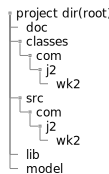

In [14]:
%%plantuml

@startsalt
{
    {T
        +project dir(root)
        ++doc
        ++classes
        +++com
        ++++j2
        +++++wk2
        ++src
        +++com
        ++++j2
        +++++wk2
        ++lib
        ++model
    }
}
@endsalt

In [15]:
%pwd

u'/Users/media/Dropbox/Me/toCopy/smu'

## 2.1 OCP 계속

* 문제
    * 문을 여는 경우, 다른 종류의 문 (확장)을 여는 경우 수정해야 할 부분이 많음 (클라이언트 + 새로운 문)
    * 또한 다른 종류의 문을 if문으로 분기처리
* 설계대안 - 상속
    * 상속으로 처리하면, 새로운 문은 간단하게 부모-자식관계.
    * 클라이언트는 수정 없슴. 부모클래스(Door)만 사용.
    * 새로운 문은 실행시점 Late binding.

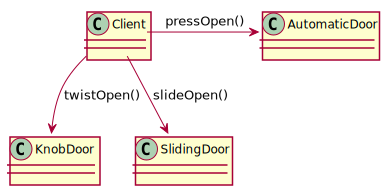

In [20]:
%%plantuml

@startuml

Client -right-> AutomaticDoor: pressOpen()
Client --> KnobDoor: twistOpen()
Client --> SlidingDoor: slideOpen()

@enduml

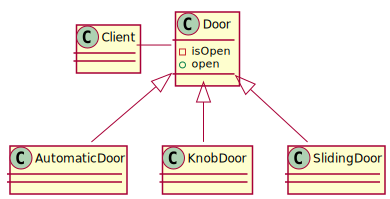

In [17]:
%%plantuml

@startuml

Client -right- Door
Door <|-- AutomaticDoor
Door <|-- KnobDoor
Door <|-- SlidingDoor

class Door {
  -isOpen
  +open()
}

@enduml

# 2.2 LSP

* 자식클래스는 부모클래스를 대체할 수 있어야 함. Subclasses should be substitutable for their base classes.
* 원과 타원의 문제 The Circle/Ellipse Dilemma
* 정사각형과 직사각형의 문제 Rectangle

# 2.3 Dependency Inversion Principle

* Depend upon Abstractions. Do not depend upon concretions
* 인터페이스, 추상클래스, 추상메소드를 사용. 구현클래스를 사용하지 말 것.
* 문의 경우 클라이언트는 추상클래스(base class)를 사용했슴. 구체클래스를 사용하지 않았슴.

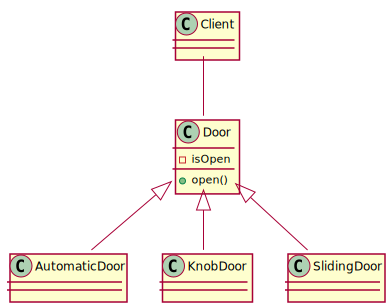

In [21]:
%%plantuml

@startuml

Client -- Door
Door <|-- AutomaticDoor
Door <|-- KnobDoor
Door <|-- SlidingDoor

class Door {
  -isOpen
  +open()
}

@enduml

# 2.4 Interface Segregation Principle

* 객체에서 나누어지는 서로 다른 기능이 있는 경우, 인터페이스로 분리
* 교재 HFDP Ch1 'Duck'

# 단순
* Simple SimDuck
* 오리를 날게 fly()

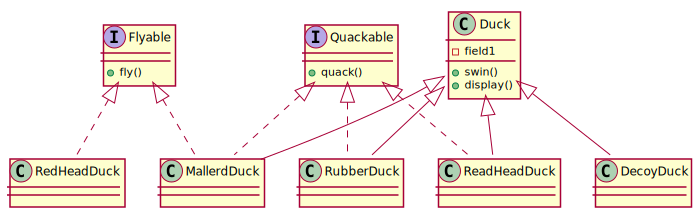

In [19]:
%%plantuml

@startuml

Interface Flyable
Interface Quackable

Duck <|-- MallerdDuck
Duck <|-- ReadHeadDuck
Duck <|-- RubberDuck
Duck <|-- DecoyDuck

Flyable <|.. MallerdDuck
Flyable <|.. RedHeadDuck

Quackable <|.. MallerdDuck
Quackable <|.. ReadHeadDuck
Quackable <|.. RubberDuck

class Duck {
  -field1
  +swin()
  +display()
}

Interface Flyable {
    +fly()
}

Interface Quackable {
    +quack()
}

@enduml

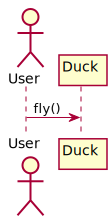

In [10]:
%%plantuml
@startuml
actor User
User -> Duck:fly()
@enduml

In [14]:
%%writefile test.java
/* ASSISTANT CODE
 *
 * Problem 2. Fill in the blanks of the following code fragment. 
 * When you run this code you get the following:
 * 
 * Problem 2. --------------------
 * MallardDuck quack..
 * WildTurkey gobble..
 * WildTurkey flying a short distance
 * WildTurkey gobble..
 * -------------------------------
 */

package com.ex.ood;

interface Duck {
	public void quack();
	public void fly();
}

class MallardDuck implements Duck {
	@Override
	public void quack() {
		System.out.println("MallardDuck quack..");
	}
	@Override
	public void fly() {
		System.out.println("MallardDuck flying");
	}
}

interface Turkey {
	public void gobble();
	public void fly();
}

class WildTurkey implements Turkey {
	@Override
	public void fly() {
		System.out.println("WildTurkey flying a short distance");
	}
	@Override
	public void gobble() {
		System.out.println("WildTurkey gobble..");
	}
}

class TurkeyAdapter implements Duck {
	Turkey turkey;
	public TurkeyAdapter(Turkey turkey) {
		this.turkey=turkey;
	}
	@Override
	public void fly() {
		turkey.fly();
	}
	@Override
	public void quack() {
		turkey.gobble();
	}
}

public class test {
	public static void main(String[] args) {
		System.out.println("Problem 2. -----------------");
        MallardDuck duck = new MallardDuck();
        duck.quack();

        WildTurkey turkey = new WildTurkey();
        turkey.gobble();
        turkey.fly();

        Duck turkeyAdapter = new TurkeyAdapter(turkey);
        turkeyAdapter.quack();
		System.out.println("----------------------------");
	}
}


Writing test.java


In [17]:
!javac -sourcepath src -d classes src/test.java
!java -classpath classes com.ex.ood.test

Problem 2. -----------------
MallardDuck quack..
WildTurkey gobble..
WildTurkey flying a short distance
WildTurkey gobble..
----------------------------
